# Part 1: Encoding and Decoding Pipeline

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import data
from skimage.color import rgb2gray
from skimage import img_as_float

In [ ]:
# Load Lena image from OpenCV's sample images
!wget -q https://raw.githubusercontent.com/opencv/opencv/master/samples/data/lena.jpg -O lena.jpg


In [ ]:
# Load image using cv2 and convert to RGB
img = cv2.imread('lena.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

(np.float64(-0.5), np.float64(511.5), np.float64(511.5), np.float64(-0.5))

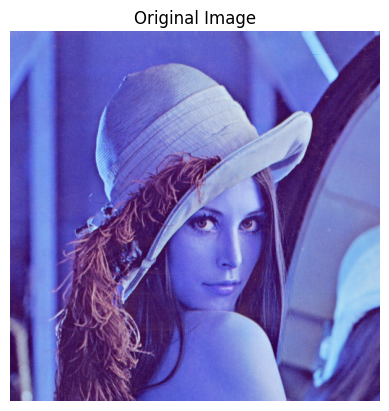

In [ ]:
plt.imshow(img)
plt.title('Original Image')
plt.axis('off')

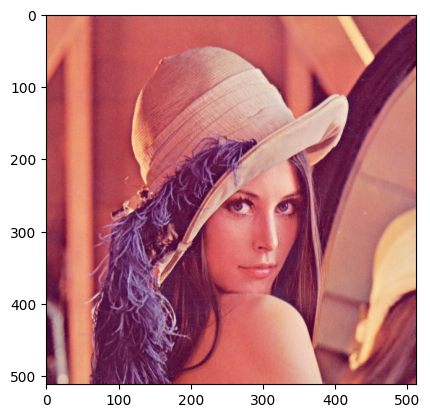

In [ ]:
plt.imshow(img_rgb)

(np.float64(-0.5), np.float64(511.5), np.float64(511.5), np.float64(-0.5))

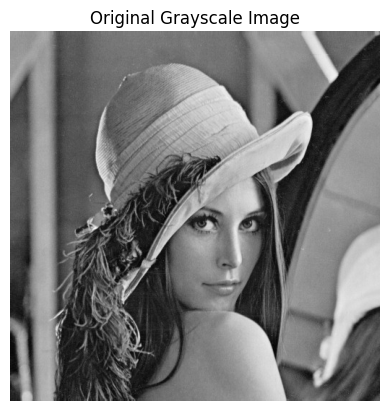

In [ ]:
# Convert to grayscale and float (range [0, 1])
gray = rgb2gray(img_rgb)
gray = img_as_float(gray)
plt.imshow(gray, cmap='gray')
plt.title('Original Grayscale Image')
plt.axis('off')

Text(0.5, 1.0, 'Histogram: Original')

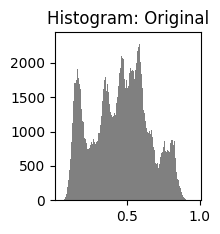

In [ ]:
# Histogram of original image
plt.subplot(2, 3, 2)
plt.hist(gray.ravel(), bins=256, color='gray')
plt.title('Histogram: Original')


In [ ]:
# Function to apply gamma correction
def gamma_correction(image, gamma):
    return np.power(image, gamma)

In [ ]:
gamma = 2.2

(np.float64(-0.5), np.float64(511.5), np.float64(511.5), np.float64(-0.5))

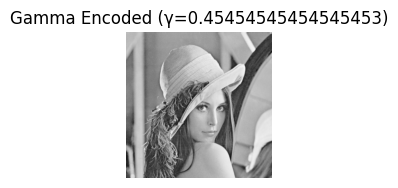

In [ ]:
# Apply Gamma Encoding (simulate storage)
gamma_encode = 1/gamma  # typical gamma
encoded = gamma_correction(gray, gamma_encode)

plt.subplot(2, 3, 3)
plt.imshow(encoded, cmap='gray')
plt.title(f'Gamma Encoded (γ={gamma_encode})')
plt.axis('off')

Text(0.5, 1.0, 'Histogram: Gamma Encoded')

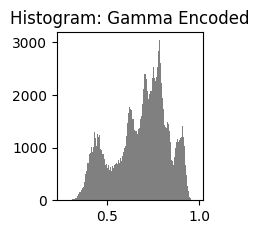

In [ ]:
# Histogram of encoded image
plt.subplot(2, 3, 4)
plt.hist(encoded.ravel(), bins=256, color='gray')
plt.title('Histogram: Gamma Encoded')

(np.float64(-0.5), np.float64(511.5), np.float64(511.5), np.float64(-0.5))

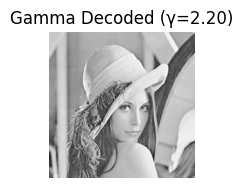

In [ ]:
# Apply Gamma Decoding (simulate display)
decoded = gamma_correction(encoded, 1/gamma)

plt.subplot(2, 3, 5)
plt.imshow(decoded, cmap='gray')
plt.title(f'Gamma Decoded (γ={1/gamma_encode:.2f})')
plt.axis('off')

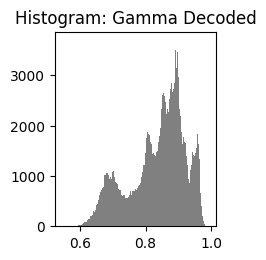

In [ ]:
# Histogram of decoded image
plt.subplot(2, 3, 6)
plt.hist(decoded.ravel(), bins=256, color='gray')
plt.title('Histogram: Gamma Decoded')

plt.tight_layout()
plt.show()

# Part 2: Encoding with same gamma value (gamma = 2.2) and Decoding with different values of Gamma

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from skimage import img_as_float

In [ ]:
# Download Lena image
!wget -q https://raw.githubusercontent.com/opencv/opencv/master/samples/data/lena.jpg -O lena.jpg

# Load and prepare grayscale image
img = cv2.imread('lena.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gray = rgb2gray(img_rgb)
gray = img_as_float(gray)  # normalize to [0, 1]

In [ ]:
# Gamma correction function
def gamma_correction(image, gamma):
    return np.power(image, gamma)

In [ ]:
# === Gamma Encoding ===
# Simulate image stored using camera-like encoding gamma
gamma_encode = 1 / 2.2  # ~0.45 for sRGB
encoded_image = gamma_correction(gray, gamma_encode)

In [ ]:
# Simulate different display monitor gamma values
display_gammas = [1.0, 1.8, 2.2, 4.0]

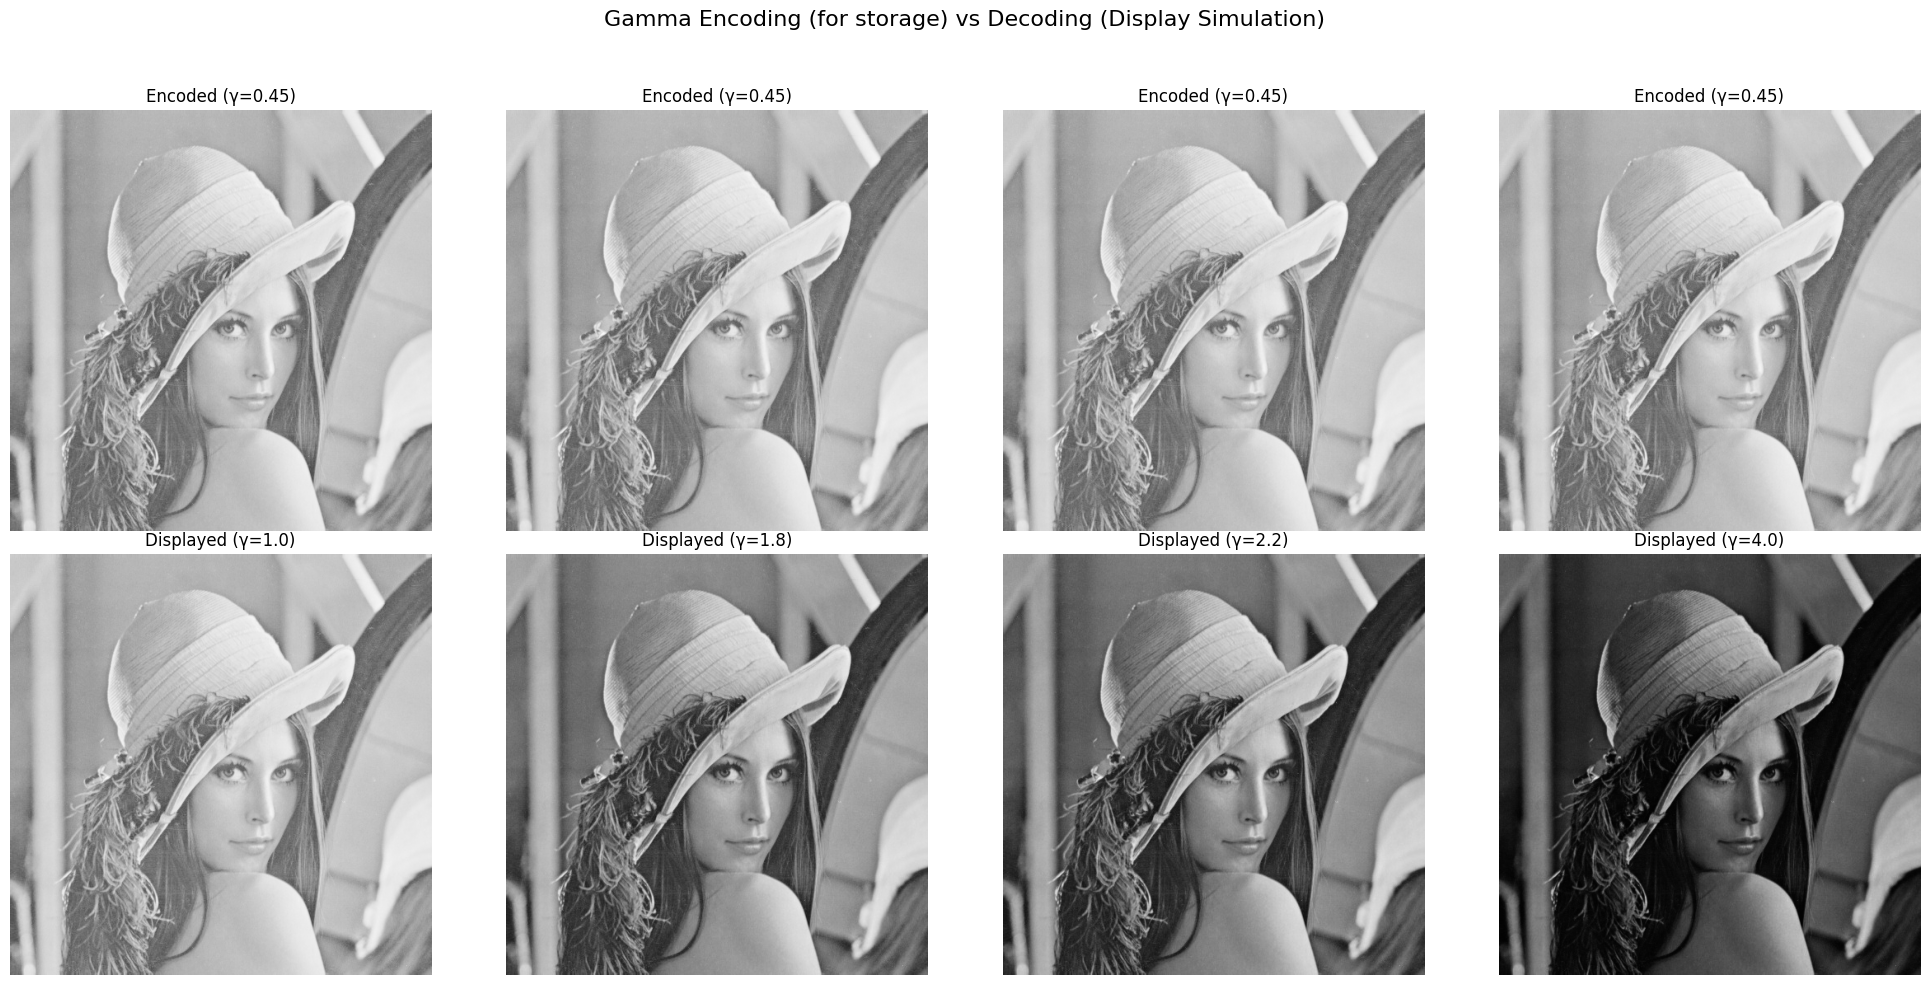

In [ ]:
# Plotting
plt.figure(figsize=(20, 10))

for i, gamma_display in enumerate(display_gammas):
    # Decode stored image using display gamma
    decoded_image = gamma_correction(encoded_image, gamma_display)

    # Top row: Stored (gamma-encoded) image (same across all)
    plt.subplot(2, 4, i+1)
    plt.imshow(encoded_image, cmap='gray', vmin=0, vmax=1)
    plt.title(f'Encoded (γ={gamma_encode:.2f})')
    plt.axis('off')

    # Bottom row: Displayed with different monitor gamma
    plt.subplot(2, 4, i+5)
    plt.imshow(decoded_image, cmap='gray', vmin=0, vmax=1)
    plt.title(f'Displayed (γ={gamma_display})')
    plt.axis('off')

plt.suptitle('Gamma Encoding (for storage) vs Decoding (Display Simulation)', fontsize=16)
plt.tight_layout()
plt.subplots_adjust(top=0.88)
plt.show()

# Part 1: Gamma Encoding/Decoding Basics:

- Gamma encoding is done before storage by a camera/sensor
- Gamma decoding is done by a display monitor before displaying
- Human visual system (HVS) doesn't perceive the brightness linearly (Imagine a curve, X-axis shows **Intensity**, Y-axis shows **Perceived brighness**). It follows a Sigmoid shape curve, which means the perceived brightness is subjective in human, it perceives higher brightness change when intensity is lower; as the intensity increases, the perceived brightness doesn't change much (the curve saturates)

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from skimage import img_as_float

In [ ]:
# Download Lena image
!wget -q https://raw.githubusercontent.com/opencv/opencv/master/samples/data/lena.jpg -O lena.jpg

# Load and prepare grayscale and RGB image
img = cv2.imread('lena.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_rgb_float = img_as_float(img_rgb)
img_gray = rgb2gray(img_rgb)
img_gray = img_as_float(img_gray)

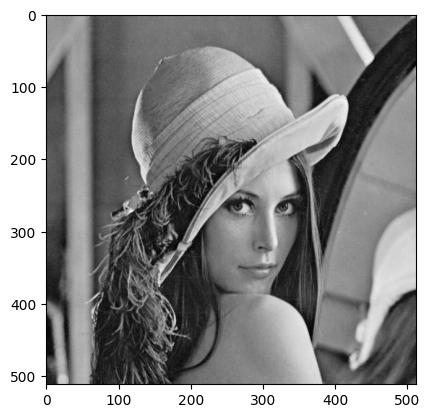

In [ ]:
plt.imshow(img_gray, cmap = 'gray')

In [ ]:
# Gamma correction function
def gamma_correction(image, gamma):
    return np.power(image, gamma)

In [ ]:
gamma = 2.2
gamma_encode = 1 / gamma
gamma_decode = gamma


In [ ]:
encoded_gray = gamma_correction(img_gray, gamma_encode)
decoded_gray = gamma_correction(encoded_gray, gamma_decode)


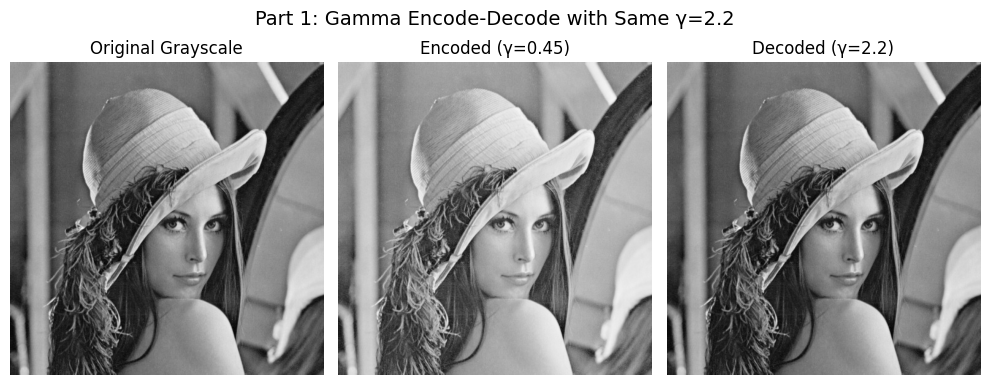

In [ ]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 3, 1)
plt.imshow(img_gray, cmap='gray')
plt.title('Original Grayscale')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(encoded_gray, cmap='gray')
plt.title(f'Encoded (γ={gamma_encode:.2f})')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(decoded_gray, cmap='gray')
plt.title(f'Decoded (γ={gamma})')
plt.axis('off')

plt.suptitle("Part 1: Gamma Encode-Decode with Same γ=2.2", fontsize=14)
plt.tight_layout()
plt.show()

## Part 2: Comparision with different Gamma values:
### Fixed Encode value, Multiple Decode value

In [ ]:
encode_gamma = 1 / 2.2
decode_gammas = [1.0, 1.8, 2.2, 4.0]

In [ ]:
encoded = gamma_correction(img_gray, encode_gamma)

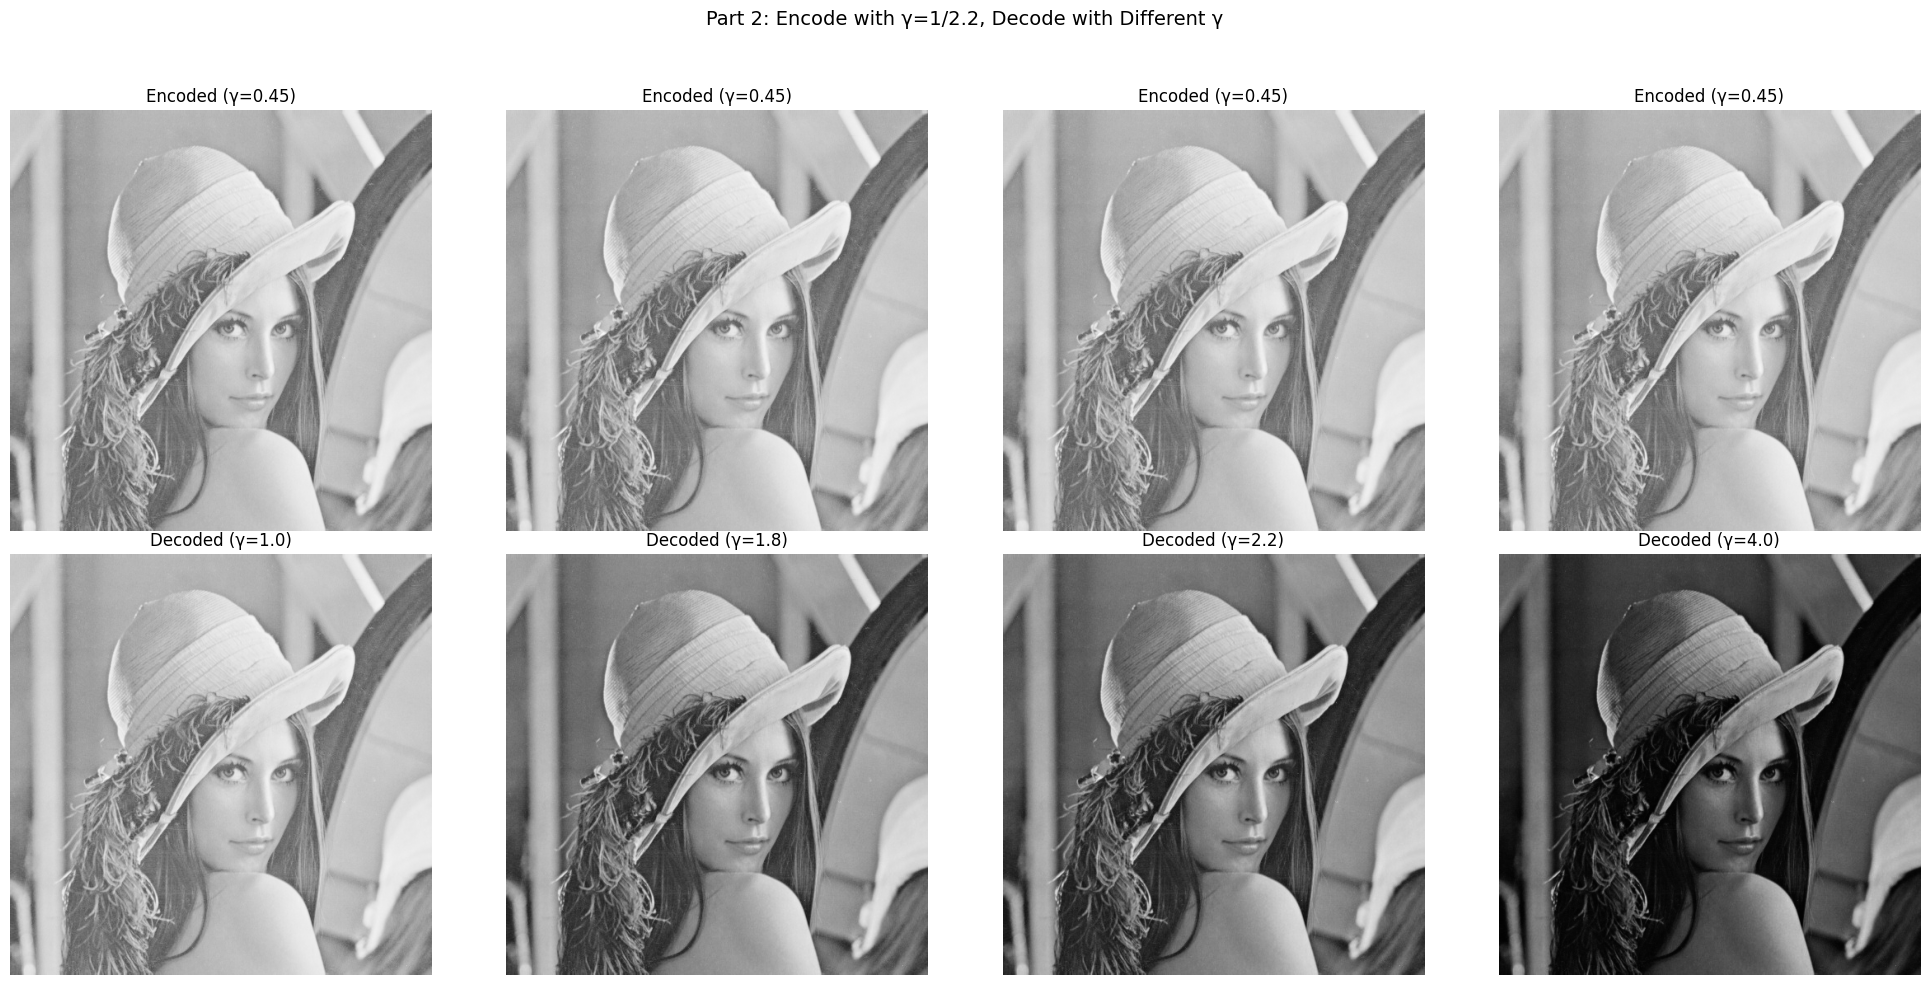

In [ ]:
plt.figure(figsize=(20, 10))

for i, decode_gamma in enumerate(decode_gammas):
    decoded = gamma_correction(encoded, decode_gamma)

    # Top row: encoded image (same)
    plt.subplot(2, 4, i+1)
    plt.imshow(encoded, cmap='gray', vmin=0, vmax=1)
    plt.title(f'Encoded (γ={encode_gamma:.2f})')
    plt.axis('off')

    # Bottom row: decoded images
    plt.subplot(2, 4, i+5)
    plt.imshow(decoded, cmap='gray', vmin=0, vmax=1)
    plt.title(f'Decoded (γ={decode_gamma})')
    plt.axis('off')

plt.suptitle("Part 2: Encode with γ=1/2.2, Decode with Different γ", fontsize=14)
plt.tight_layout()
plt.subplots_adjust(top=0.88)
plt.show()

### Curves

In [ ]:
decode_gammas = [1.0, 1.8, 2.2, 4.0]
x = np.linspace(0, 1, 1000)
encoded_gamma = 1 / 2.2  # For storage (like sRGB)
encoded_curve = np.power(x, encoded_gamma)  # Blue: camera compression


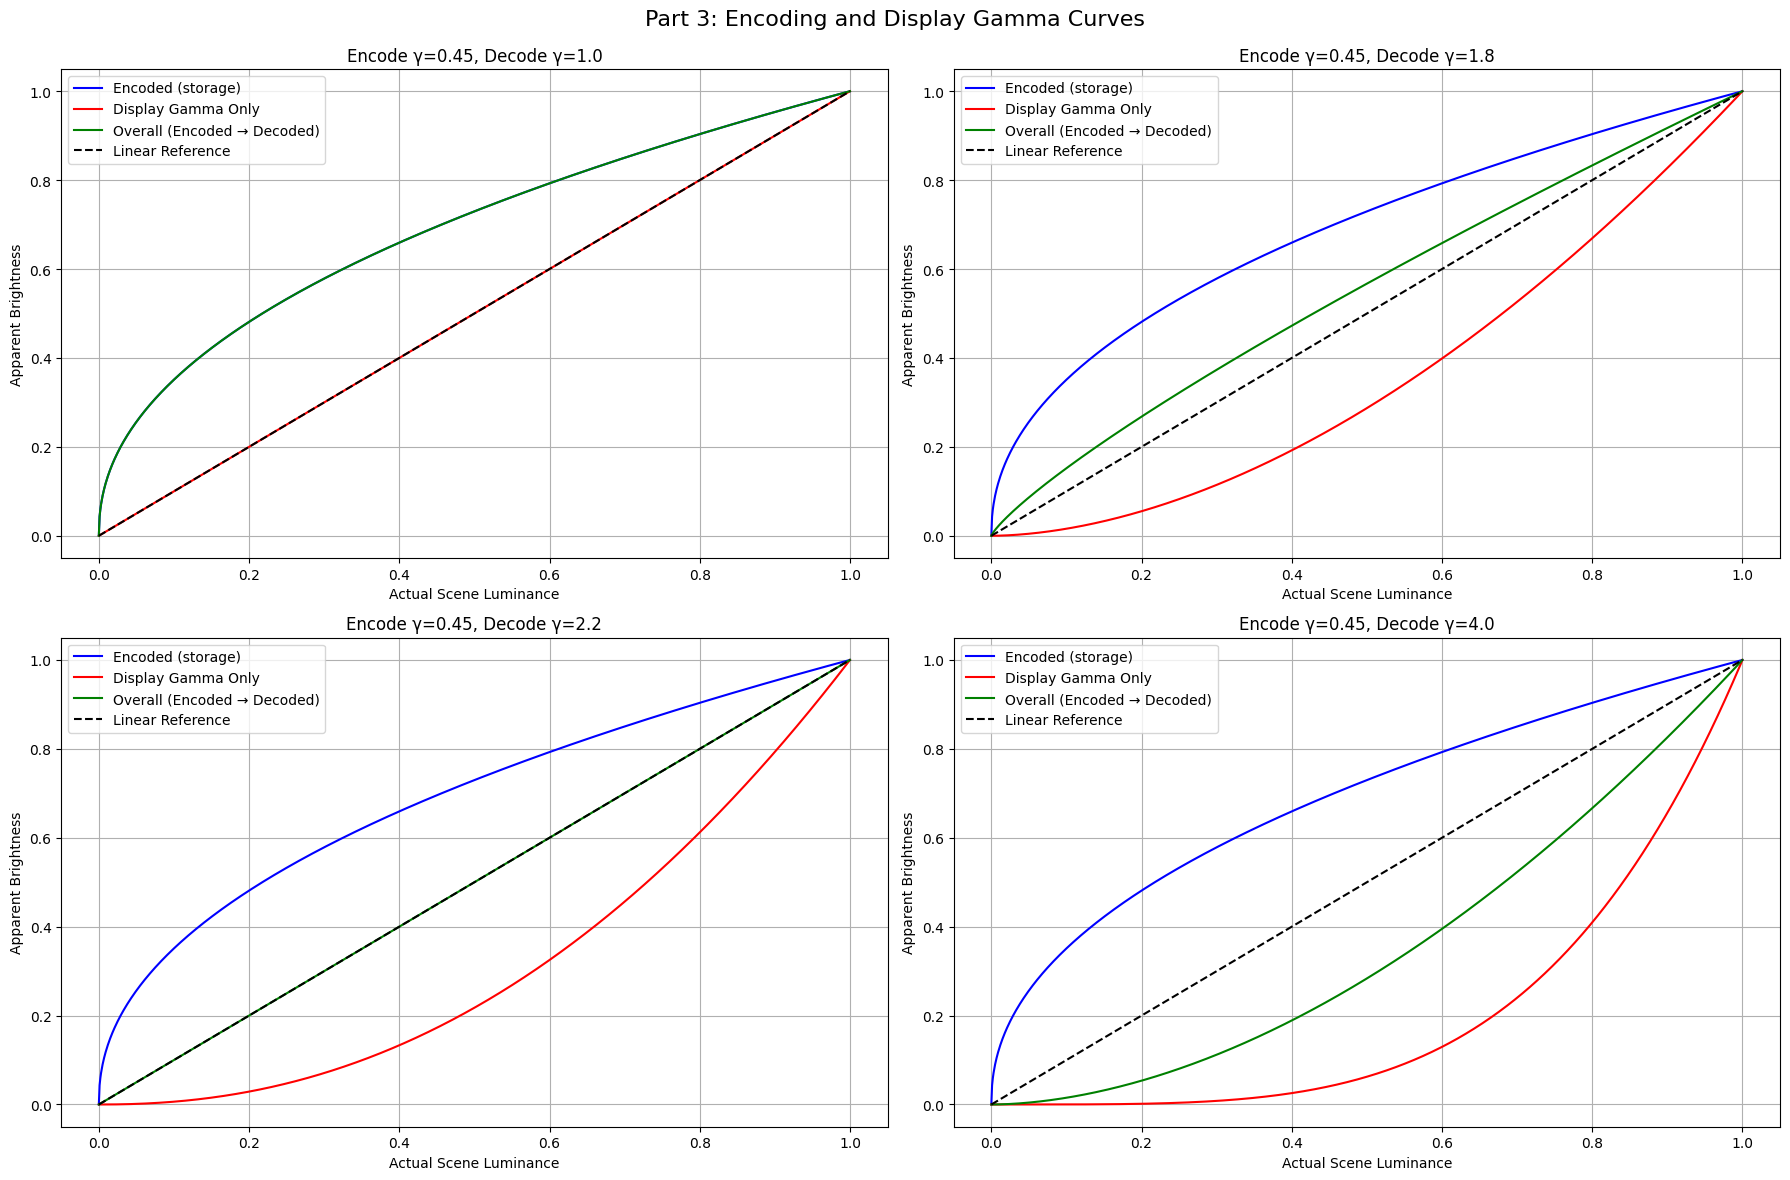

In [ ]:
plt.figure(figsize=(18, 12))

for i, gamma_display in enumerate(decode_gammas):
    red_curve = np.power(x, gamma_display)  # Red: display gamma alone (no encoding)
    green_curve = np.power(encoded_curve, gamma_display)  # Green: encoded + decoded

    plt.subplot(2, 2, i+1)
    plt.plot(x, encoded_curve, label='Encoded (storage)', color='blue')
    plt.plot(x, red_curve, label='Display Gamma Only', color='red')
    plt.plot(x, green_curve, label='Overall (Encoded → Decoded)', color='green')
    plt.plot(x, x, '--', color='black', label='Linear Reference')

    plt.title(f'Encode γ={encoded_gamma:.2f}, Decode γ={gamma_display}')
    plt.xlabel('Actual Scene Luminance')
    plt.ylabel('Apparent Brightness')
    plt.legend()
    plt.grid(True)

plt.suptitle("Part 3: Encoding and Display Gamma Curves", fontsize=16)
plt.tight_layout()
plt.subplots_adjust(top=0.93)
plt.show()

# Part 3: Extended for RGB: Encode and Decode

In [ ]:
encoded_rgb = gamma_correction(img_rgb_float, encode_gamma)

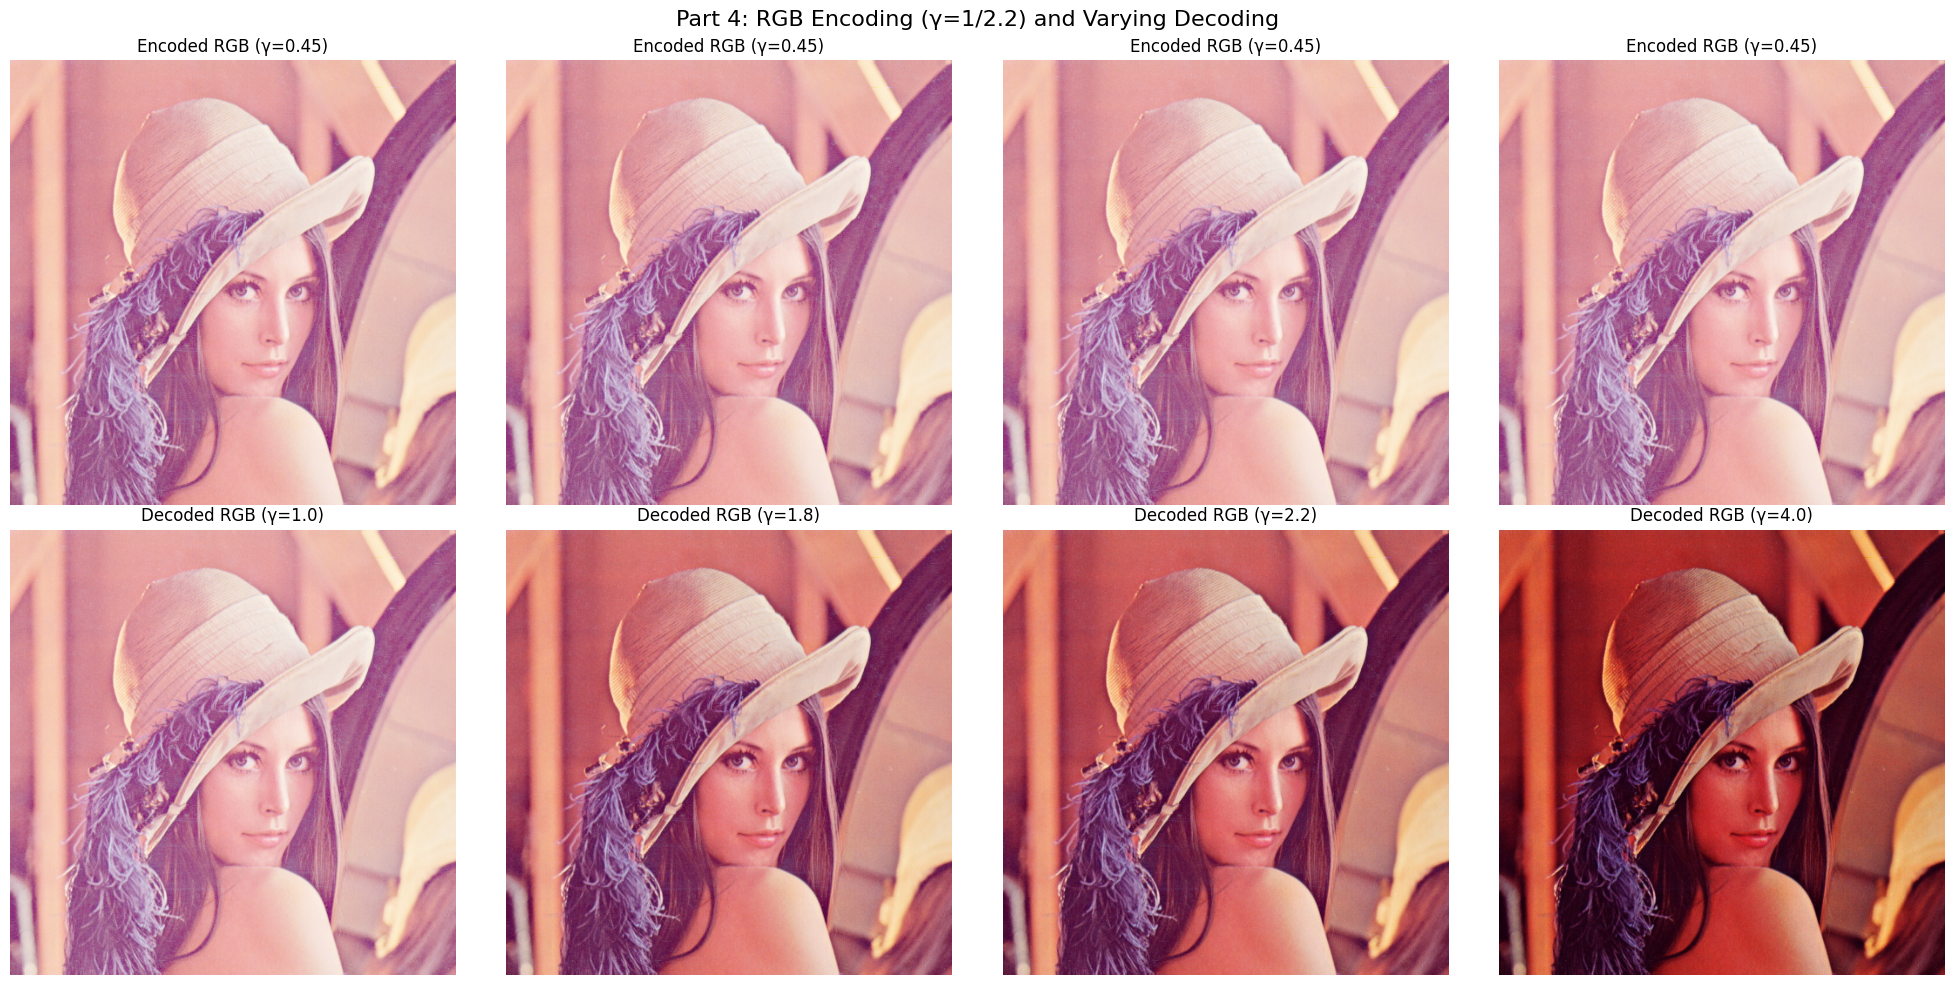

In [ ]:
plt.figure(figsize=(20, 10))

for i, decode_gamma in enumerate(decode_gammas):
    decoded_rgb = gamma_correction(encoded_rgb, decode_gamma)

    # Top row: Encoded RGB (same for all)
    plt.subplot(2, 4, i+1)
    plt.imshow(encoded_rgb)
    plt.title(f'Encoded RGB (γ={encode_gamma:.2f})')
    plt.axis('off')

    # Bottom row: Decoded RGB
    plt.subplot(2, 4, i+5)
    plt.imshow(decoded_rgb)
    plt.title(f'Decoded RGB (γ={decode_gamma})')
    plt.axis('off')

plt.suptitle("Part 4: RGB Encoding (γ=1/2.2) and Varying Decoding", fontsize=16)
plt.tight_layout()
plt.subplots_adjust(top=0.93)
plt.show()